# Overview

This notebook is meant for quick analysis checks of hdf5 plt outputs. For example, checking field values within or along a user-defined data object. 

 USE A DIFFERENT NOTEBOOK FOR SPECIFIC ANALYSIS WORK 

## Loading in the data

The `yt` class has the attribute `.load()` which will parse and store all data available in a given HDF5 file (Hierarchial Data Format v5). Storing this object (which is in itself a `yt` class), we can then call some more attributes.

`ds.all_data()` catagorizes all of the data loaded in from the HDF5 file into a massive dictionary with data for each cell for each **field value** available. A **field value** is a dictionary entry for which each FLASH cell has a value. Examples include 'dens', 'pres', 'temp', 'mass'. 

For a full list of accessible field values, call upon the all_data attribute field_list: `ds.all_data().field_list()`

`YT` also has straightforward methods to calculate other field values based on the fields chosen to be saved in the FLASH parameter file. I have successfully written my own method for a derived field and as far as I can tell, it does not vary at all from `YT`'s methods:

`ds.all_data().derived_field_list()`

In [1]:
# Import everything we need for basic analysis. YT will handle most of this.
import yt
yt.funcs.mylog.setLevel(40) # Surpresses YT status output.
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = './data-in/M4V02_R07_update_1/turbsph_hdf5_chk_0013'
#file_path = './data-in/small_cloud/turbsph_hdf5_plt_cnt_0000' 
#file_path = './data-in/josh_plt_0000'

ds = yt.load(file_path) # loads in data into data set class. This is what we will use to plot field values
ad = ds.all_data() # Can call on the data set's property .all_data() to make an object 
                   # containing all data available to be parsed through.
                   # print ad['mass'] will print the list of all cell masses. print ad.mass().max()


## Plotting the hydro data
YT can plot the data provided in an hdf5 data file. 

The two main types of plots to be used are 'slice' and 'projection' plots.
To generate a plot object, call the yt class attribute of your choice and store the object.

`yt.SlicePlot(data_set, field_name, projection_axis)`

Let's try this with a slice plot of the data file we loaded in previously:

In [16]:
field ='dens'
ax = 'z'
plot_ = yt.ProjectionPlot(ds, ax, field)


There are many atrributes we can set for a `YT` plot, the ones I have determined to be most useful are executed here. A full list can be found at: 

https://yt-project.org/doc/visualizing/plots.html


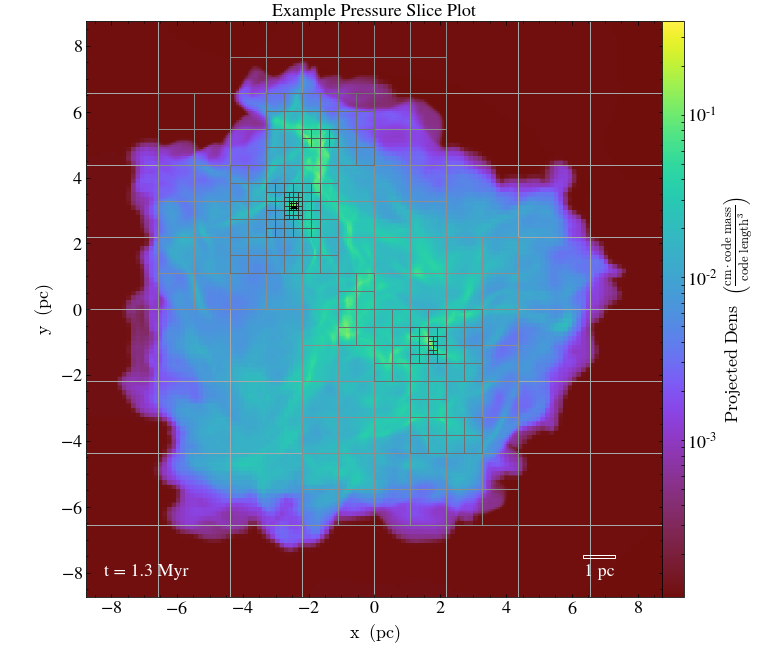

In [17]:
plot_.annotate_timestamp()
plot_.annotate_grids()
#plot_.annotate_velocity()
#plot_.set_zlim('dens', 1.0e-3, 1.0e-1)
plot_.annotate_title('Example Pressure Slice Plot')
plot_.annotate_scale()
plot_.show()

In [36]:
print ad['dens'].max()

rho = 1e-18 * 1000 / (100)**3
print rho

3.40655511728e-19 code_mass/code_length**3
1e-21


## Creating a data object

Sometimes we want to look at something specific within our data that is not easily noticable in a simple plot.

All the mass within an off-center sphere? Radial density profile? How do we access this information?

Data Object! https://yt-project.org/doc/analyzing/objects.html

For example, let's look at the gas pressure as a function of radius:

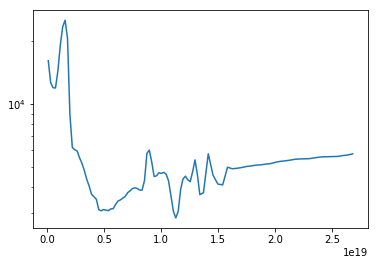

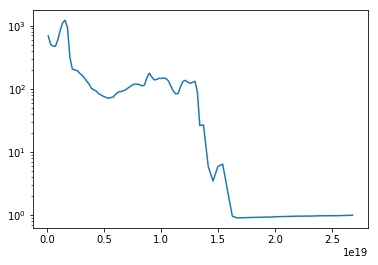

In [11]:
start = ((0.0, "pc"), (0.0, "pc"), (0.0, "pc"))
end = ((55.0, "pc"), (0.0, "pc"), (0.0, "pc"))
ray = ds.r[start:end]
pressure = ray['pres'].v
radius = ray['x'].v
plt.semilogy(radius, pressure/1.38e-16)
plt.show()
start = ((0.0, "pc"), (0.0, "pc"), (0.0, "pc"))
end = ((55.0, "pc"), (0.0, "pc"), (0.0, "pc"))
ray = ds.r[start:end]
H_dens = ray['H_nuclei_density'].v
radius = ray['x'].v
plt.semilogy(radius, H_dens)
plt.show()

## Plotting Particle Data

[ 2.  1.] dimensionless



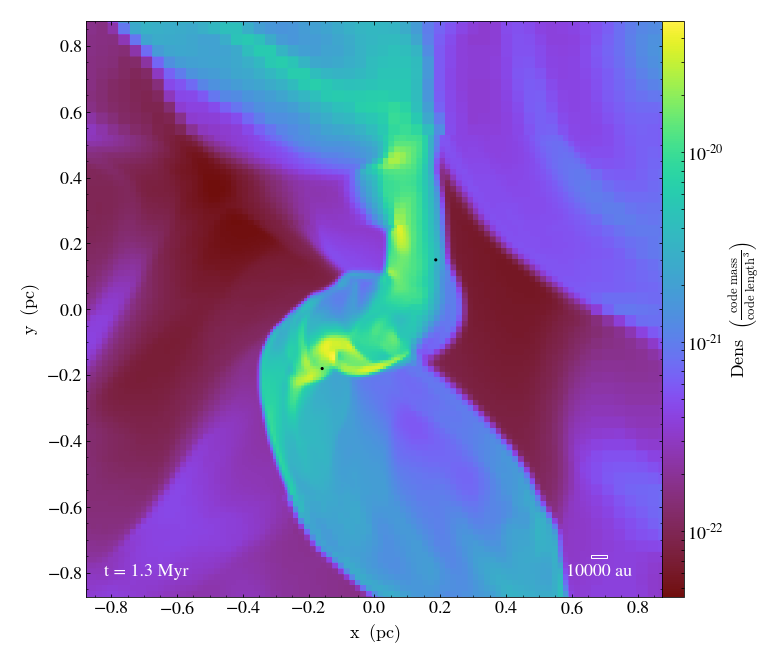

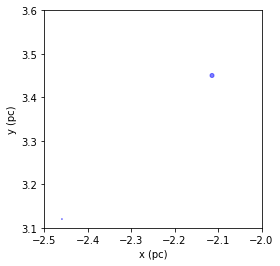

In [41]:
pc = 3.086e+18
print ad['particle_type']
ppx = ad['all', 'particle_posx'].to('pc').value
ppy = ad['all', 'particle_posy'].to('pc').value
ppz = ad['all', 'particle_posz'].to('pc').value
ppm = ad['all', 'particle_mass'].to('Msun').value
windy = ad['all', 'particle_dmdt'].value
windy[windy > 0] = 1
slice_ = yt.SlicePlot(halos_ds, 'z', 'dens')
slice_.annotate_particles((10, 'pc'),p_size=10)

slice_.pan((-2.3*pc, +3.3*pc))
slice_.zoom(10)
slice_.annotate_scale()

slice_.annotate_timestamp()
slice_.show()
plt.scatter(ppx, ppy, s=ppm*6, c=windy, cmap='bwr', alpha=0.5)
plt.gca().set_aspect('equal')
plt.xlim(-2.5, -2.0)
plt.ylim(+3.10, +3.6)
plt.xlabel('x (pc)')
plt.ylabel('y (pc)')
plt.show()


In [20]:
print ppz

[-0.12613923  0.32599851]


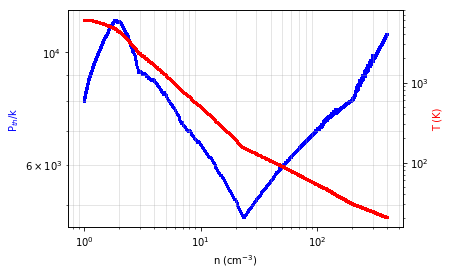

In [70]:
H_dens_list = ad['gas', 'H_nuclei_density'].v
T_list = ad['temp'].v
P_list = ad['pres'].v / 1.38e-16

fig = plt.figure()
ax1 = plt.gca()
ax1.scatter(H_dens_list, P_list, 
            s=1, 
            color='b', 
            label='P/k'
           )
#ax1.set_xlim(1.,11.0)
ax1.set_ylabel('P$_{th}$/k')
ax1.yaxis.label.set_color('blue')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('n (cm$^{-3}$)')
ax1.grid(which='minor', alpha=0.4)
ax2 = ax1.twinx()
ax2.scatter(H_dens_list, T_list, s=1, color='r', label='T')
#ax2.set_xlim(1.,11.0)
ax2.set_ylabel('T (K)')
ax2.yaxis.label.set_color('red')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.show()


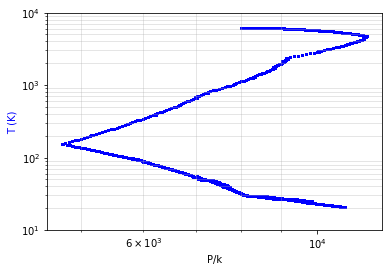

In [48]:
fig = plt.figure()
ax1 = plt.gca()
ax1.scatter(P_list , T_list, s=1, color='b')
#ax1.set_xlim(1.,11.0)
ax1.set_ylabel('T (K)')
ax1.set_ylim(10, 10000)
ax1.yaxis.label.set_color('blue')
ax1.set_xlabel('P/k')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.grid(which='minor', alpha=0.4)
plt.show()

In [73]:
pres_lowlim = []
pres_highlim = []
for i in H_dens_list:
    pres1 = 4300*1.0/i
    pres2 = 2700*1.0/i
    pres_highlim.append(pres1)
    pres_lowlim.append(pres2)

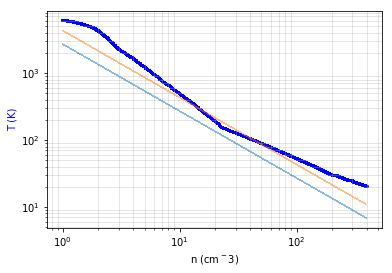

In [78]:
# The pressure range (reported in Draine) that contains the stable regime
#nT = 4300 cm^-3 K
#nT = 2700
fig = plt.figure()
ax1 = plt.gca()
ax1.scatter(H_dens_list, T_list, s=1, color='b')
#ax1.set_xlim(1.,11.0)
ax1.set_ylabel('T (K)')
ax1.yaxis.label.set_color('blue')
ax1.set_xlabel('n (cm$^-3$)')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.plot(H_dens_list, pres_lowlim, linestyle='--', linewidth=0.5, alpha=0.5)
ax1.plot(H_dens_list, pres_highlim, linestyle='--', linewidth=0.5, alpha=0.5)
ax1.grid(which='minor', alpha=0.4)
plt.show()




In [23]:
print T_list.max()
print H_dens_list.max()

6110.08984375
396.308520072


In [49]:
#file_path = './data-in/cooling_match_0001' 
file_path = './data-in/M4V02/M4cloud_0011'
ds1 = yt.load(file_path) # loads in data into data set class. This is what we will use to plot field values
ad1 = ds1.all_data() 

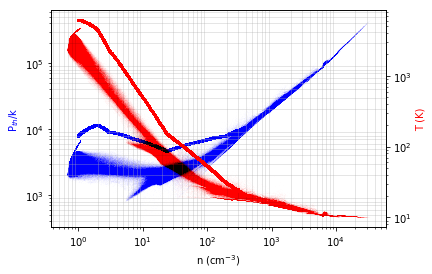

In [50]:
H_dens_list1 = ad1['gas', 'H_nuclei_density'].v
T_list1 = ad1['temp'].v
P_list1 = ad1['pres'].v / 1.38e-16

fig = plt.figure()
ax1 = plt.gca()
ax1.scatter(H_dens_list1, P_list1, 
            s=1, 
            color='b', 
            label='P/k',
            alpha=0.005
           )
#ax1.set_xlim(1.,11.0)
ax1.set_ylabel('P$_{th}$/k')
ax1.yaxis.label.set_color('blue')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('n (cm$^{-3}$)')
ax1.grid(which='minor', alpha=0.4)
ax2 = ax1.twinx()

ax2.scatter(H_dens_list1, T_list1, s=1, color='r', label='T',alpha=0.005)
#ax2.set_xlim(1.,11.0)
ax2.set_ylabel('T (K)')
ax2.yaxis.label.set_color('red')
ax2.set_yscale('log')
ax2.set_xscale('log')
#ax3 = ax2.twiny()
ax2.scatter(H_dens_list, T_list, s=1, color='r', label='T')
#ax3.set_yscale('log')
#ax3.set_xscale('log')
#ax4 = ax1.twiny()
ax1.scatter(H_dens_list, P_list, 
            s=1, 
            color='b', 
            label='P/k'
           )
#ax4.set_yscale('log')
#ax4.set_xscale('log')
plt.show()